# Problem Set #1

1.1D kernel density estimator (5 points).

(a) Create three histograms, each of symp days (Incubation period, days to symptomatic). The first one is the overall histogram. Let each histgram have 15 bins over the range of days from 2 to 15 (the maximum in the data). In the matplotlib.pyplot.hist() call, set the histogram to den- sity density=True. Let the first histogram be for all the data. Let the second histogram be for individuals of age≤ 40, and let the third histogram be for individuals age> 40.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Read the data
df = pd.read_csv('COVIDincubation.txt')
df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


Text(0.5, 1.0, 'Histogram of days until symptoms(full sample)')

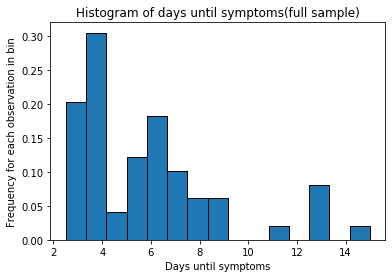

In [3]:
# Plot total data
symp_days_total = df['symp_days'].values
num_bins = 15
n_total, bin_cuts_total, patches_total = plt.hist(symp_days_total, num_bins, density=True, 
                                                  edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')
plt.title('Histogram of days until symptoms(full sample)')

Text(0.5, 1.0, 'Histogram of days until symptoms (age ≤ 40)')

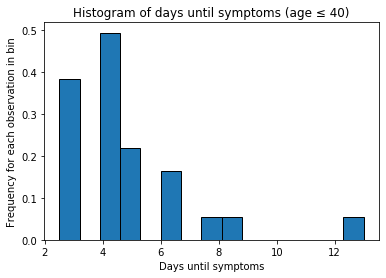

In [4]:
#Plot individuals of age≤40
symp_days_young = df['symp_days'][df['age'] <= 40].values
n_young, bin_cuts_young, patches_young = plt.hist(symp_days_young, num_bins, density=True,
                                                  edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')
plt.title('Histogram of days until symptoms (age ≤ 40)')

Text(0.5, 1.0, 'Histogram of days until symptoms (age > 40)')

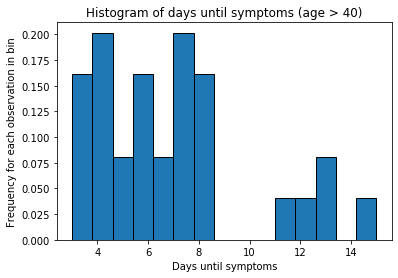

In [10]:
#Plot individuals of age>40
symp_days_old = df['symp_days'][df['age'] > 40].values
n_old, bin_cuts_old, patches_old = plt.hist(symp_days_old, num_bins, density=True,
                                                  edgecolor='black')
plt.xlabel('Days until symptoms')
plt.ylabel('Frequency for each observation in bin')
plt.title('Histogram of days until symptoms (age > 40)')

(b) Fit a Gaussian KDE as an approximation ot the incubation period for each of the three subsets of data from part (a). Use the GridSearchCV and LeaveOneOut methods as in the VanderPlas notebook to choose an optimal bandwith, and report your optimal bandwidths for the three KDEs. For your grid search, use 500 exponentially spaced bandwidths between 0.1 and 10 using the code: bandwidths = 10 ** np.linspace(-1, 1, 500). Plot each of the KDE distributions in one plot with a legend that shows which is which. This figure should look like the right panel of Figure 2 in Men et al. (2020).

In [5]:
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

In [7]:
# Find optimal bandwidth for KDE (total sample)
N_total = symp_days_total.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_total = GridSearchCV(KernelDensity(kernel='gaussian'), 
                          {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_total.fit(symp_days_total.reshape((N_total, 1)))
bandwidth_total_opt = grid_total.best_params_['bandwidth']
#print("Total sample optimal bandwidth =", bandwidth_total)

# Calculate the KDE (total sample)
kde_total = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_total.fit(symp_days_total.reshape((N_total, 1)))
x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_total = kde_total.score_samples(x_pts).reshape((1000, 1))

In [8]:
# Find optimal bandwidth for KDE (for age <= 40)
N_young = symp_days_young.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_young = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_young.fit(symp_days_young.reshape((N_young, 1)))
bandwidth_total_opt = grid_young.best_params_['bandwidth']

# plot the KDE (age<=40 sample)
kde_young = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_young.fit(symp_days_young.reshape((N_young, 1)))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_young = kde_young.score_samples(x_pts).reshape((1000, 1))

In [11]:
# Find optimal bandwidth for KDE (for age > 40)
N_old = symp_days_old.size
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_old = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_old.fit(symp_days_old.reshape((N_old, 1)))
bandwidth_total_opt = grid_old.best_params_['bandwidth']

# plot the KDE (age>40 sample)
kde_old = KernelDensity(bandwidth=bandwidth_total_opt, kernel='gaussian')
kde_old.fit(symp_days_old.reshape((N_old, 1)))
x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_old = kde_old.score_samples(x_pts).reshape((1000, 1))

Text(0.5, 1.0, 'KDE Distributions for Different Age Groups')

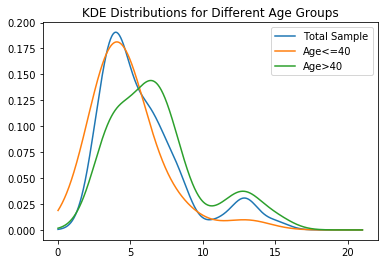

In [12]:
# Plot each of the KDE distributions in one plot
plt.plot(x_pts, np.exp(logprob_total), label=r'Total Sample')
plt.plot(x_pts, np.exp(logprob_young), label=r'Age<=40')
plt.plot(x_pts, np.exp(logprob_old), label=r'Age>40')
plt.legend()
plt.title('KDE Distributions for Different Age Groups')

(c) What does this tell you about COVID-19 incubation periods of young versus old individuals?

The KDE distributions for different age groups indicates that in general the old (age > 40) tend to have a longer incubation period than the young(age <= 40). More specifically, young people are more likely to show symptoms in day4, while more old people show symptoms in day7.

2.2D kernel density estimator (5 points).

(a) Read in the BQ probmat.txt data as a 73 × 7 NumPy array. Plot the 2D empirical histogram of these data as a 3D surface plot with age and income group on the x-axis and y-axis and the histogram density on the z-axis using a 3D surface plot tool (not a 3D bar histogram tool). Make sure that the axes are labeled correctly. And make sure that your 3D histogram is presented from a perspective that allows a viewer to see that data (don’t let the data be hidden by a poor angle of the plot.)

In [13]:
from scipy.stats import gaussian_kde
%matplotlib notebook

<IPython.core.display.Javascript object>


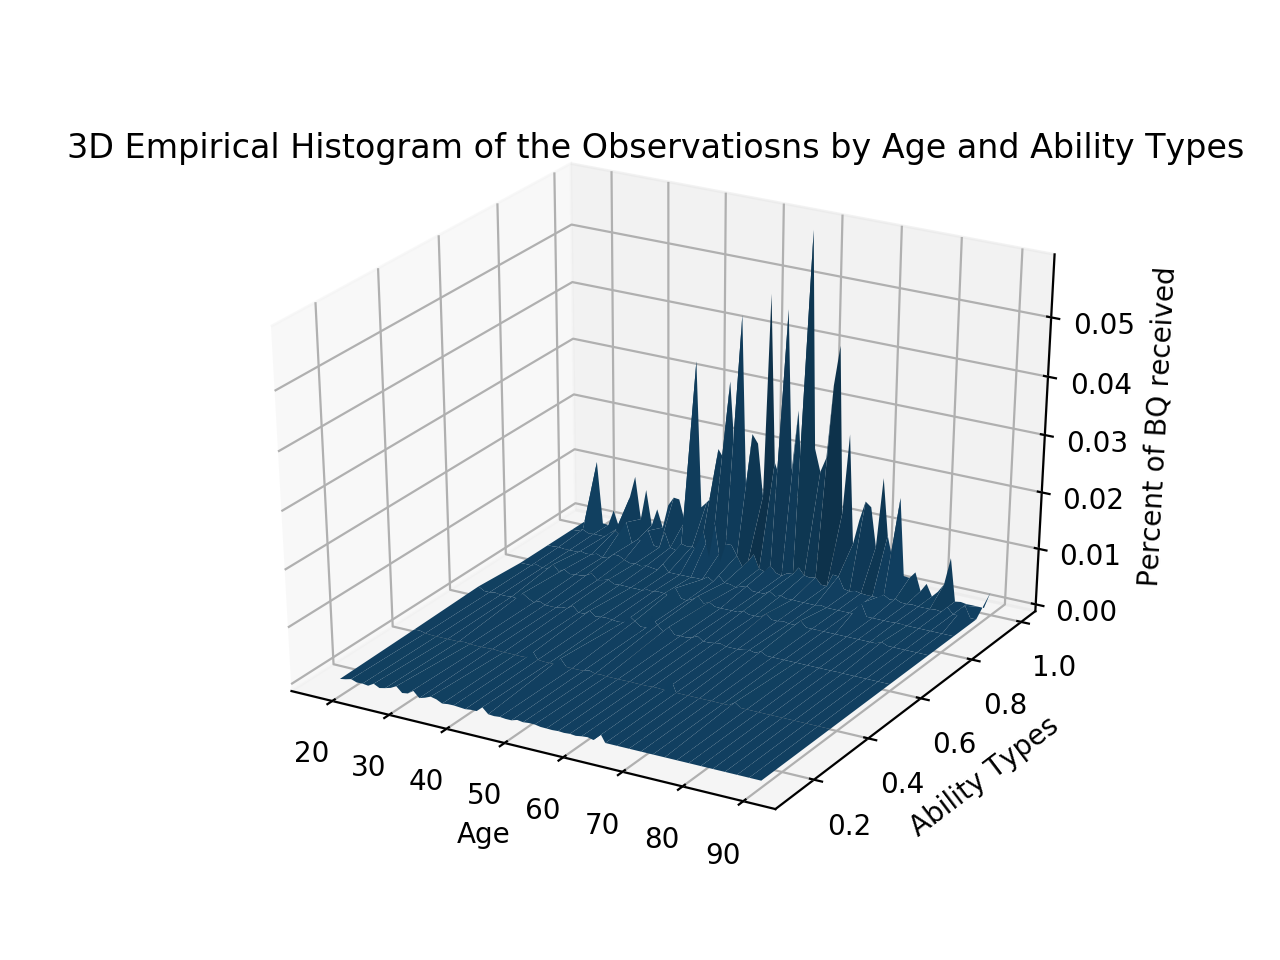

Text(0.5, 0.92, '3D Empirical Histogram of the Observatiosns by Age and Ability Types')

In [14]:
# Read the data
BQ_data = np.loadtxt('BQ_probmat.txt', delimiter=',')
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = np.array([0.125, 0.375, 0.60, 0.75, 0.85, 0.94, 0.995])

# age_mat = np.tile(age_vec.reshape((73, 1)), (1, 7))
# lamdas_mat = np.tile(lambdas_mdpts.reshape((1, 7)), (73, 1))
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, BQ_data.reshape((73, 7)))
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of BQ received')
plt.title('3D Empirical Histogram of the Observatiosns by Age and Ability Types')

(b) Use the BQ ind data.txt data to fit a bivariate Gaussian kernel density estimator to the data using the scipy.stats.gaussian kde method. Choose a bandwidth parameter λ that you think is best. Justify your choice of that parameter. Your justification should have to do with the tradeoff between overfitting (too low a value) and underfitting (too high a value). Plot the surface of your chosen kernel density estimator. Make sure that the axes are labeled correctly. And make sure that your 3D his- togram is presented from a perspective that allows a viewer to see that data. What is the estimated density for bequest recipients who are age 61 in the 6th lifetime income category (j = 6, 90th to 99th percentile).

In [23]:
# Read the data
bq_ind_df = pd.read_csv('BQ_ind_data.txt')
bq_ind_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


In [24]:
bq_ind_mat = bq_ind_df.values
kde_density = gaussian_kde(bq_ind_mat.T, bw_method=0.2)
age_array = bq_ind_df['age']

income_array = bq_ind_df['income_pctl']
age_min, age_max = age_array.min(), age_array.max()
income_min, income_max = income_array.min(), income_array.max()

age_mat_i, income_mat_i = np.mgrid[age_min:age_max:73j, income_min:income_max:7j]
coords = np.vstack([age_mat_i.ravel(), income_mat_i.ravel()])
Z = np.reshape(kde_density(coords), age_mat_i.shape)
Z_scaled = Z / float(np.sum(Z))

<IPython.core.display.Javascript object>


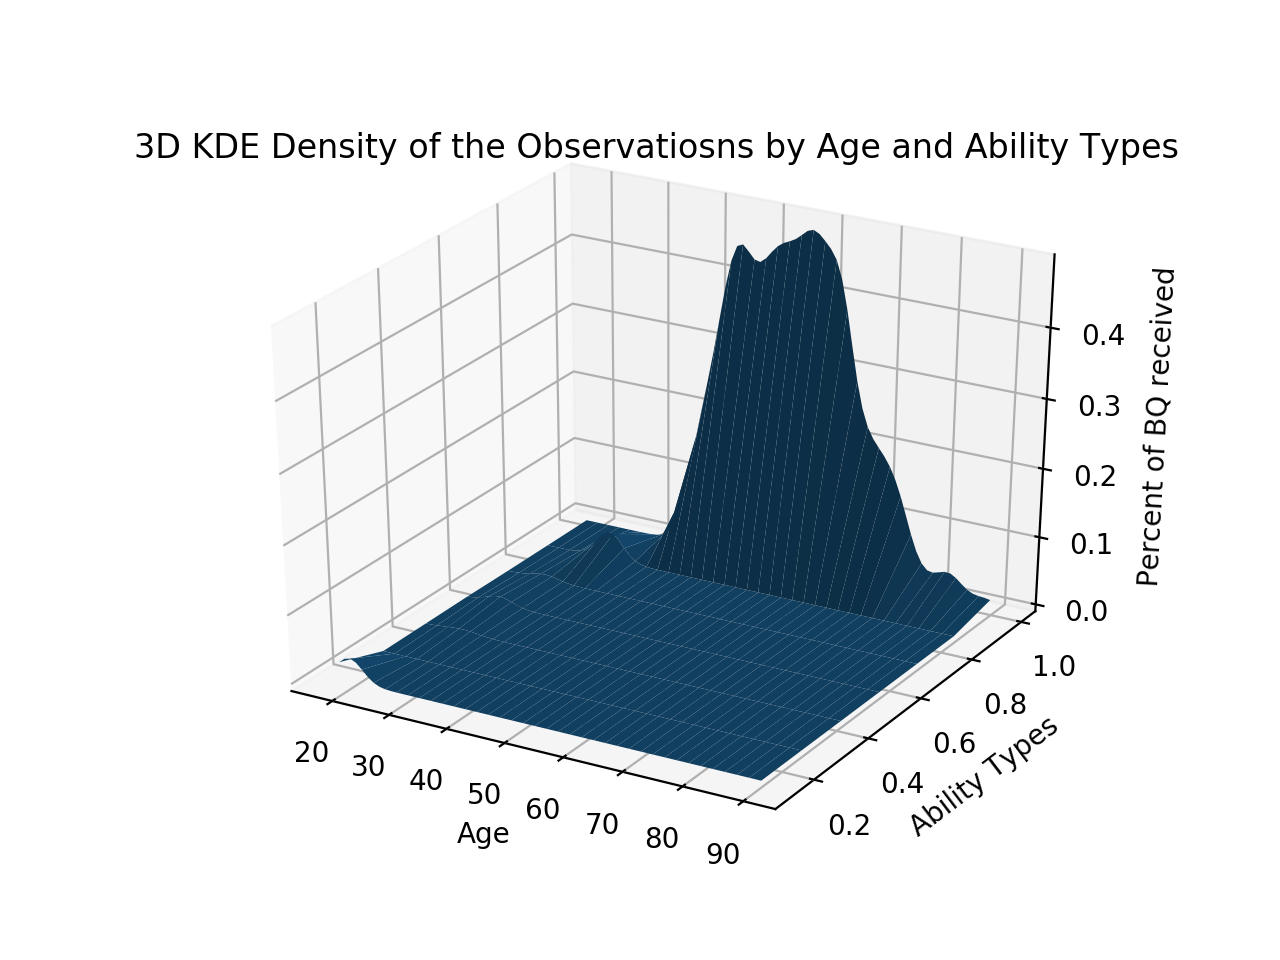

Text(0.5, 0.92, '3D KDE Density of the Observatiosns by Age and Ability Types')

In [25]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(age_pos, income_pos, freq)
ax.set_xlabel('Age')
ax.set_ylabel('Ability Types')
ax.set_zlabel('Percent of BQ received')
plt.title('3D KDE Density of the Observatiosns by Age and Ability Types')

The best bandwidth parameter is 0.2. I tried different bandwidth parameter in the above code, and found that choosing 0.2 will gives a relatively smoothing figure without overfitting the data.

In [28]:
print("The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is", Z_scaled[61-13+1][5])

The estimated density for bequest recipients who are age 61 in the 6th lifetime income category is 1.3155834892086134e-10
